# **4. Algorithmic Question**
Two brilliant strategists, Arya and Mario, are about to play a game with a sequence of numbers. Arya, as player 1, begins the game, while Mario, player 2, plays 2nd. Their goal is clear: to collect the highest possible score by taking numbers from either end of the sequence, one at a time. They will play in perfect synchronicity, each seeking the advantage.

The sequence represented as an array of nums, is laid out in front of them. Arya will start by selecting either the number at the beginning (nums[0]) or the end (nums[nums.length - 1]) of the array, adding that value to her score. This value is then removed from the beginning or the end of nums. Then, it’s Mario’s turn to do the same with the remaining sequence. The game proceeds this way, with each player taking numbers from either end until no numbers are left to claim. The player with the highest score wins.

However, if they end in a tie, Arya, as the first to act, will claim victory by default.

Arya is now before you, asking for help to predict her chances. She wants to know, with her best possible choices, whether she can guarantee a win, assuming both players play with perfect skill.

a) Help Arya by providing a pseudocode for finding an optimal playing strategy, that is, a strategy that maximizes her value. (Hint: Use recursion, assuming that both players play optimally).

b) Write a Python program implementing her game strategy. Try different array lengths to test the algorithm.

c) Is the algorithm efficient? Prove that it is polynomial and provide an asymptotic time complexity bound, or show that it requires exponential time.

d) If the algorithm is exponential, explain how to make it polynomial and provide a pseudocode for it. Recompute the computational complexity of the updated algorithm.

e) Implement the algorithm in Python. Compare your result values with the previous algorithm. Also compare the running times.

f) Finally, consult LLM (ChatGPT, Claude AI, Gemini, Perplexity, etc.) to craft a third, optimized implementation and analyze its time complexity. Also, explain if the LLM is doing a good job and how you can evaluate whether the suggested solution works properly.

This problem is an example of **adversarial search** - two players playing a zero-sum game, meaning each player can only maximize their gain while minimizing the gain of the other - here, optimal plays by Arya maximize her score while minimizing Mario’s, and vice versa. The most basic way of solving this kind of problem is with **the Minimax algorithm**, which covers the logic described above. It’s a recursive algorithm where we build a tree of search states where each depth alternates between Arya’s turns and Mario’s turns, however, in its pure form, it has exponential complexity and is essentially **a brute force algorithm, since all states are explored**. Still, it guarantees an optimal solution.

A pseudocode for Minimax in this case would be:

In [ ]:
"""minimax (nums, start, end, who):

	  If start > end:
		return 0
		If who == 1:
			pick_start = nums[start] + minimax(nums, start + 1, end,  2)
			pick_end = nums[end] + minimax(nums, start, end - 1, 2)
 			return max(pick_start, pick_end)
		If who == 2:
			pick_start = nums[start] + minimax(nums, start + 1, end,  1)
			pick_end = nums[end] + minimax(nums, start, end - 1, 1)
 			return min(pick_start, pick_end)"""

In our example, Arya will be the maximizing player, and the minimax algorithm will calculate her optimal playing strategy. The recursion’s base case is evaluated by start > end, in which case we’ve run out of indices to pick from the array, so Arya has 0 points left to gain. In all other nodes, minimax is called recursively for each pick (from start or from end) and the game is either maximized or minimized depending on whose turn it is (1 for Arya, 2 for Mario).


The algorithm's Python implementation is given below. Its complexity is exponential because at each recursion depth, two more calls occur (for the pick_start, pick_end subarrays), going from 2, 4, 8, 16...2^n calls.

In [ ]:
#A library we will use to benchmark the execution time of the algorithms.
import time

In [ ]:
test_cases = [
    [1, 5, 2],
    [1, 5, 233, 7],
    [0, 0, 0],
    [5, 5, 5, 5, 5],
    [7, 9923, 2, 2111, 65, 3, 8, 20]
]
longer_sequences = [
    [i for i in range(10, -1, -1)],
    [i for i in range(0,15)],
    [i for i in range(50,-1, -2)],
]

In [ ]:
test_cases = [
    [1, 5, 2],
    [1, 5, 233, 7],
    [0, 0, 0],
    [5, 5, 5, 5, 5],
    [7, 9923, 2, 2111, 65, 3, 8, 20]
]

for nums in test_cases:
  print(nums)
  start_time = time.time()
  result = canAryaWin(nums)
  end_time = time.time()
  print(result)
  print("Execution time (s): " + str(end_time - start_time) + "\n")

[1, 5, 2]
(Brute-force Minimax) Arya's score: 3 Total sum: 8
False
Execution time (s): 5.1021575927734375e-05

[1, 5, 233, 7]
(Brute-force Minimax) Arya's score: 234 Total sum: 246
True
Execution time (s): 4.076957702636719e-05

[0, 0, 0]
(Brute-force Minimax) Arya's score: 0 Total sum: 0
True
Execution time (s): 3.504753112792969e-05

[5, 5, 5, 5, 5]
(Brute-force Minimax) Arya's score: 15 Total sum: 25
True
Execution time (s): 5.793571472167969e-05

[7, 9923, 2, 2111, 65, 3, 8, 20]
(Brute-force Minimax) Arya's score: 12057 Total sum: 12139
True
Execution time (s): 0.0002448558807373047



The problem with the MiniMax algorithm is that while it's correct and exhaustive, it's **highly inefficient** - the state space branches out exponentially and every state is explored. It's possible to write a dramatically faster algorithm by modifying Minimax to use **memoization**. In the original algorithm, each state is recalculated many times and there's no "memory" that it has already been traversed. However, we can keep track of these executions by storing them in a dictionary. This way, once an old state has been reached, **the algorithm can use its computed value directly** and avoid these recalculations, as well as higher depth function calls on the subarrays, that make the algorithm exponential. This reduces the overall complexity into polynomial time. The logic of the algorithm is the same otherwise.

The reason why the algorithm is reduced to polynomial complexity is because in the memoization table, we store at most 2 (two players) * n (different values for start) *n (different values for end) entries, where n = the length of the array. Once these values are stored, they are never recomputed, giving O(n^2).

Thus, the pseudocode would be very similar to the first version.

An important flaw to highlight for both recursion-based algorithms is that there's **a depth limit to how many recursive calls can be made before it causes a stack overflow**. Both algorithms will fail for extremely large arrays that exceed the system's defined recursion depth.

In [ ]:
"""minimax_memo(nums, start, end, who, memo):

	  If start > end:
		return 0

    if state in memo:
      return the result of this state

		If who == 1:
			pick_start = nums[start] + minimax(nums, start + 1, end,  2)
			pick_end = nums[end] + minimax(nums, start, end - 1, 2)
 			return max(pick_start, pick_end)
		If who == 2:
			pick_start = nums[start] + minimax(nums, start + 1, end,  1)
			pick_end = nums[end] + minimax(nums, start, end - 1, 1)
 			return min(pick_start, pick_end)

    update memo dictionary with result from this state"""


In [ ]:
for nums in test_cases:
  print(nums)
  start_time = time.time()
  result = canAryaWinMemo(nums)
  end_time = time.time()
  print(result)
  print("Execution time (s): " + str(end_time - start_time) + "\n")

[1, 5, 2]
(Minimax with Memoization) Arya's score: 3 Total sum: 8
False
Execution time (s): 0.0004458427429199219

[1, 5, 233, 7]
(Minimax with Memoization) Arya's score: 234 Total sum: 246
True
Execution time (s): 0.0004584789276123047

[0, 0, 0]
(Minimax with Memoization) Arya's score: 0 Total sum: 0
True
Execution time (s): 5.91278076171875e-05

[5, 5, 5, 5, 5]
(Minimax with Memoization) Arya's score: 15 Total sum: 25
True
Execution time (s): 4.363059997558594e-05

[7, 9923, 2, 2111, 65, 3, 8, 20]
(Minimax with Memoization) Arya's score: 12057 Total sum: 12139
True
Execution time (s): 8.630752563476562e-05



In [ ]:
for sequence in longer_sequences:

  start_time = time.time()
  result = canAryaWin(sequence)
  end_time = time.time()
  print(result)
  print("Execution time of first algorithm (s): " + str(end_time - start_time))

  start_time = time.time()
  result = canAryaWinMemo(sequence)
  end_time = time.time()
  print(result)
  print("Execution time of optimized algorithm (s): " + str(end_time - start_time) + "\n")


(Brute-force Minimax) Arya's score: 30 Total sum: 55
True
Execution time of first algorithm (s): 0.001241922378540039
(Minimax with Memoization) Arya's score: 30 Total sum: 55
True
Execution time of optimized algorithm (s): 0.000141143798828125

(Brute-force Minimax) Arya's score: 56 Total sum: 105
True
Execution time of first algorithm (s): 0.02707219123840332
(Minimax with Memoization) Arya's score: 56 Total sum: 105
True
Execution time of optimized algorithm (s): 0.0004944801330566406

(Brute-force Minimax) Arya's score: 338 Total sum: 650
True
Execution time of first algorithm (s): 38.85745882987976
(Minimax with Memoization) Arya's score: 338 Total sum: 650
True
Execution time of optimized algorithm (s): 0.0004298686981201172



Finally, we asked an LLM (ChatGPT) to provide an optimal solution, copied directly below. It opted to use **a dynamic programming-based solution**, applying the algorithm to subarrays of the original array and storing the subresults in a i x j table, with each cell representing the maximum score between the ith and jth element. The solution has a nested for loop, and hence, a quadratic complexity overall. Because dynamic programming is iterative instead of recursive, this solution avoids the recursive overhead of recursive function calls. Another added benefit is that there is no risk of overflowing the stack with a recursive call that's too deep, so it works for extremely large arrays, as well. The LLM did a good job since **the solution is both faster and will work for array lengths where a recursive function will fail.**

In [ ]:
# Test cases
for t in test_cases:
  print(t)
  print(PredictTheWinner(t))

[1, 5, 2]
False
[1, 5, 233, 7]
True
[0, 0, 0]
True
[5, 5, 5, 5, 5]
True
[7, 9923, 2, 2111, 65, 3, 8, 20]
True


In [ ]:
#Verifying that the first algorithm's execution time grows exponentially whereas the other two do not.

benchmark_lists = []

for i in range(10,20):
  benchmark_lists.append(list(range(i+1)))

et1, et2, et3 = [], [], []

for b in benchmark_lists:

  start_time = time.time()
  result = canAryaWin(b)
  end_time = time.time()
  total = end_time - start_time
  et1.append(total)

  start_time = time.time()
  result = canAryaWinMemo(b)
  end_time = time.time()
  total = end_time - start_time
  et2.append(total)


  start_time = time.time()
  result = PredictTheWinner(b)
  end_time = time.time()
  total = end_time - start_time
  et3.append(total)


(Brute-force Minimax) Arya's score: 30 Total sum: 55
(Minimax with Memoization) Arya's score: 30 Total sum: 55
(Brute-force Minimax) Arya's score: 36 Total sum: 66
(Minimax with Memoization) Arya's score: 36 Total sum: 66
(Brute-force Minimax) Arya's score: 42 Total sum: 78
(Minimax with Memoization) Arya's score: 42 Total sum: 78
(Brute-force Minimax) Arya's score: 49 Total sum: 91
(Minimax with Memoization) Arya's score: 49 Total sum: 91
(Brute-force Minimax) Arya's score: 56 Total sum: 105
(Minimax with Memoization) Arya's score: 56 Total sum: 105
(Brute-force Minimax) Arya's score: 64 Total sum: 120
(Minimax with Memoization) Arya's score: 64 Total sum: 120
(Brute-force Minimax) Arya's score: 72 Total sum: 136
(Minimax with Memoization) Arya's score: 72 Total sum: 136
(Brute-force Minimax) Arya's score: 81 Total sum: 153
(Minimax with Memoization) Arya's score: 81 Total sum: 153
(Brute-force Minimax) Arya's score: 90 Total sum: 171
(Minimax with Memoization) Arya's score: 90 Total 

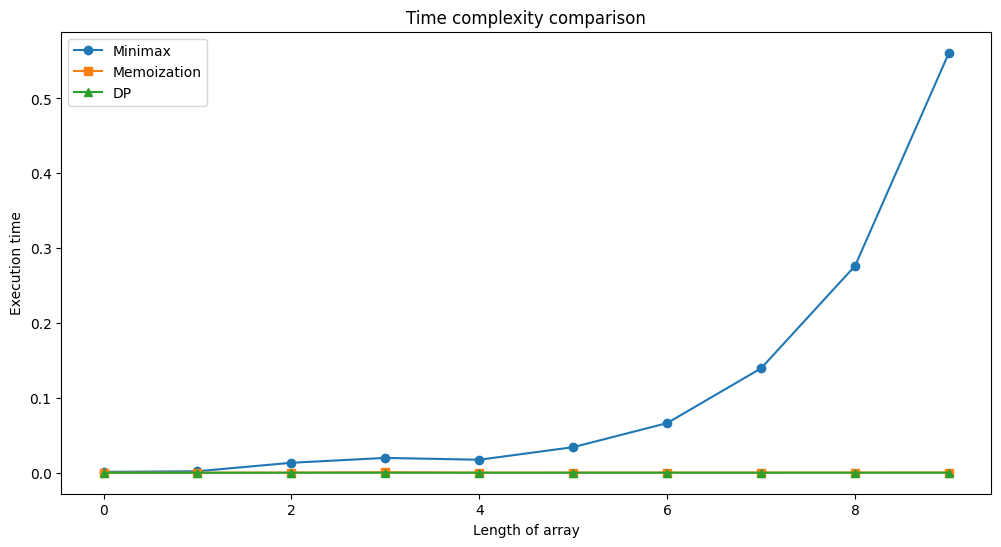

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(et1, label="Minimax", marker='o')
plt.plot(et2, label="Memoization", marker='s')
plt.plot(et3, label="DP", marker='^')
plt.xlabel("Length of array")
plt.ylabel("Execution time")

plt.title("Time complexity comparison")
plt.legend()
plt.show()

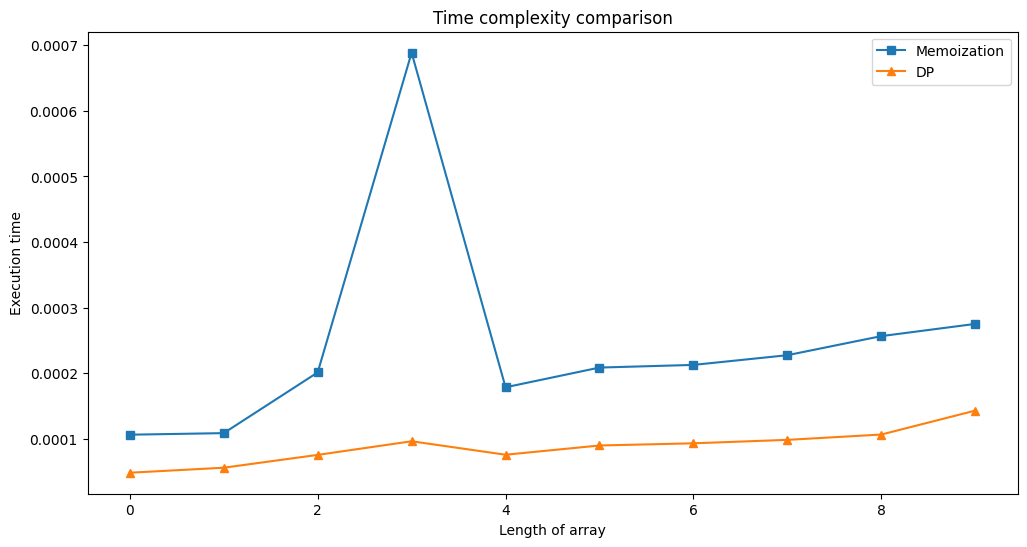

In [ ]:
#Plotting the running time for just  the polynomial complexity algorithms.
plt.figure(figsize=(12, 6))

plt.plot(et2, label="Memoization", marker='s')
plt.plot(et3, label="DP", marker='^')
plt.xlabel("Length of array")
plt.ylabel("Execution time")

plt.title("Time complexity comparison")
plt.legend()
plt.show()

(Minimax with Memoization) Arya's score: 2550 Total sum: 5050
(Minimax with Memoization) Arya's score: 2809 Total sum: 5565
(Minimax with Memoization) Arya's score: 3080 Total sum: 6105
(Minimax with Memoization) Arya's score: 3364 Total sum: 6670
(Minimax with Memoization) Arya's score: 3660 Total sum: 7260
(Minimax with Memoization) Arya's score: 3969 Total sum: 7875
(Minimax with Memoization) Arya's score: 4290 Total sum: 8515
(Minimax with Memoization) Arya's score: 4624 Total sum: 9180
(Minimax with Memoization) Arya's score: 4970 Total sum: 9870
(Minimax with Memoization) Arya's score: 5329 Total sum: 10585
(Minimax with Memoization) Arya's score: 5700 Total sum: 11325
(Minimax with Memoization) Arya's score: 6084 Total sum: 12090
(Minimax with Memoization) Arya's score: 6480 Total sum: 12880
(Minimax with Memoization) Arya's score: 6889 Total sum: 13695
(Minimax with Memoization) Arya's score: 7310 Total sum: 14535
(Minimax with Memoization) Arya's score: 7744 Total sum: 15400
(

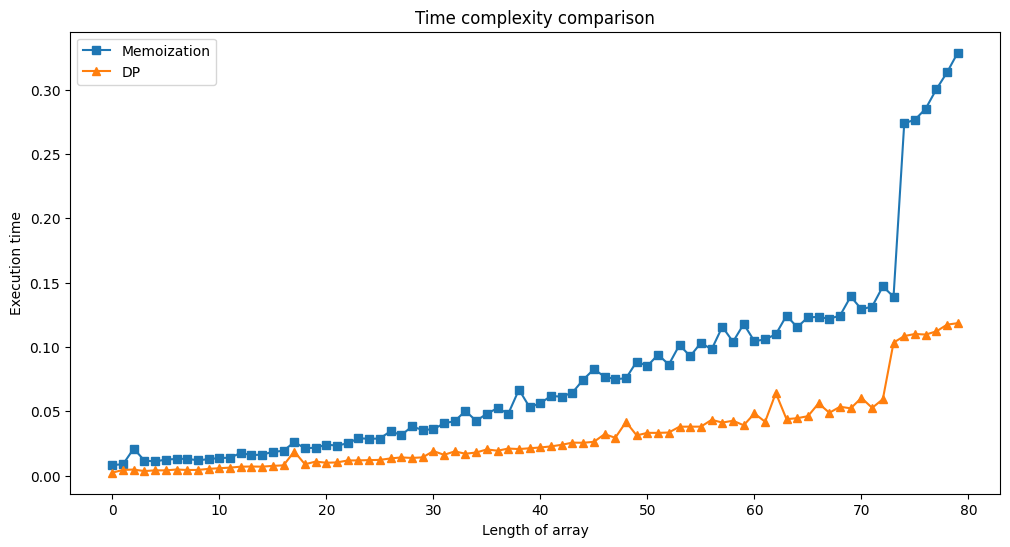

In [ ]:
#Verifying that the dynamic programming solution is faster than the memoization one using bigger arrays, although both are polynomial.
#There's a huge spike in execution time out of nowhere for both algorithms after a while. It might be Colab throttling resources.

bigger_lists = []

for i in range (100, 500, 5):
  bigger_lists.append(list(range(i+1)))

et2, et3 = [], []
for b in bigger_lists:

  start_time = time.time()
  result = canAryaWinMemo(b)
  end_time = time.time()
  total = end_time - start_time
  et2.append(total)


  start_time = time.time()
  result = PredictTheWinner(b)
  end_time = time.time()
  total = end_time - start_time
  et3.append(total)


plt.figure(figsize=(12, 6))

plt.plot(et2, label="Memoization", marker='s')
plt.plot(et3, label="DP", marker='^')
plt.xlabel("Length of array")
plt.ylabel("Execution time")

plt.title("Time complexity comparison")
plt.legend()
plt.show()